In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid
from numpy import linspace, loadtxt, ones, convolve
import numpy as numpy

In [3]:
allf = []

path = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cen180racon.cenh3.deep.csv\cen180racon.cenh3.deep.csv"
newaccessiondf = pd.read_csv(path)
accession_df = pd.read_csv(path)
newaccessiondf.rename(columns={"seqSameOrientation":"sequence","chromosome":"fasta.name"}, inplace = True)
newaccessiondf.sort_values(by=['fasta.name','start'], inplace=True)
accession_df.head()

,Unnamed: 0,seq,start,end,strand,strand.1,length,seqSameOrientation,weightedSNV,chromosome,...,HORlengthsSum,percentageIdentity,cenh3.mean,cenh3input.mean,rec8input.mean,log2chipceninput,log2chiprecinput,cg.mean,chg.mean,chh.mean
0,1,caataaacatgcaatctagtcatatttgactcgaaaacactaacca...,14377190.0,14377364,+,cen180minus,175,agaataagacttagaaccgcaaccggatcttaaaagcctaagtagg...,39.951581,1,...,0,95.061609,1.822086,0.915293,1.213936,0.559197,0.350149,0.853340,0.169775,0.121234
1,2,caatcatacacatgacatctagtcatatttgacttcaaaacactag...,14377365.0,14377543,+,cen180minus,179,agtataagaactagaatcacaactgaatcttaaaaacctaatttag...,44.640895,1,...,0,94.481966,1.836969,1.414335,0.889701,0.232725,0.586193,0.895300,0.144600,0.116641
2,3,caatcatacacatgccatctagtcatatttgactccaaaacactat...,14377544.0,14377713,+,cen180minus,170,agtataagacttagaaccaatcttaaaagcctaagtagtgtttcct...,36.944187,1,...,0,95.433351,2.130123,1.550307,0.867395,0.295548,0.745193,NaN,0.191250,0.092841
3,4,aatcatacacatgacatcaagtcatatttgactccaaaatactaaa...,14377715.0,14377890,+,cen180minus,176,atataagaaatagaaccacaatagaatcttaaaaccctaagtagtg...,36.953123,1,...,7,95.432247,1.781286,0.937754,0.729954,0.521366,0.685018,0.886563,0.480400,0.096665
4,5,caataatacacattacatcaagtcatatttgactccaaaacactga...,14377892.0,14378067,+,cen180minus,176,agtataagaactagaatagcaaccagatcttaaaagcctaagtagt...,37.199498,1,...,7,95.401793,0.243594,0.000000,0.155521,0.314516,0.105973,0.828525,0.329483,0.131522


c:\users\christie and victori\pycharmprojects\satellite_research_project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 200.0)

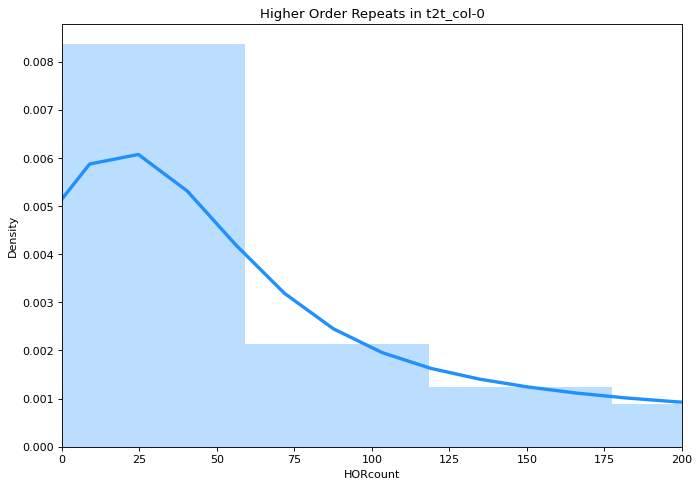

In [4]:
#plot higher order repetition data for all chr
plt.pyplot.figure(figsize=(10,7), dpi= 80) #change size of plot

x = accession_df["HORcount"]
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':3}) # alpha changes opacity of bars, kde plots line on graph
sns.distplot(x, color="dodgerblue", label="Compact", **kwargs) 
plt.title("Higher Order Repeats in t2t_col-0")
plt.xlim(0,200)
#plt.pyplot.savefig(r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\histograms\HOR in t2t.png")

In [19]:
cen180 = accession_df[accession_df["length"].between(165, 180)]
accession_df = cen180
freqrep = cen180["chromosome"].value_counts()
wanted = []
for i in freqrep.index:
    chrom = cen180.get(cen180["chromosome"] == i)
    minlen = chrom["start"].min()
    maxlen = chrom["start"].max()
    wanted.append([i,minlen,maxlen])

df = pd.DataFrame(wanted, columns = ['chromosome','start','end'])
#df.head()

In [72]:
#create moving averages
accession_df.rename(columns={"cg.mean":"cgmean","chg.mean":"chgmean","chh.mean":"chhmean"}, inplace = True)
accession_df['moving average1'] = accession_df.HORcount.rolling(250).mean().shift(-25)
accession_df['moving average2'] = accession_df.cgmean.rolling(250).mean().shift(-25)
accession_df['moving average3'] = accession_df.chgmean.rolling(250).mean().shift(-25)
accession_df['moving average4'] = accession_df.chhmean.rolling(250).mean().shift(-25)
accession_df['moving average5'] = accession_df.log2chipceninput.rolling(250).mean().shift(-25)


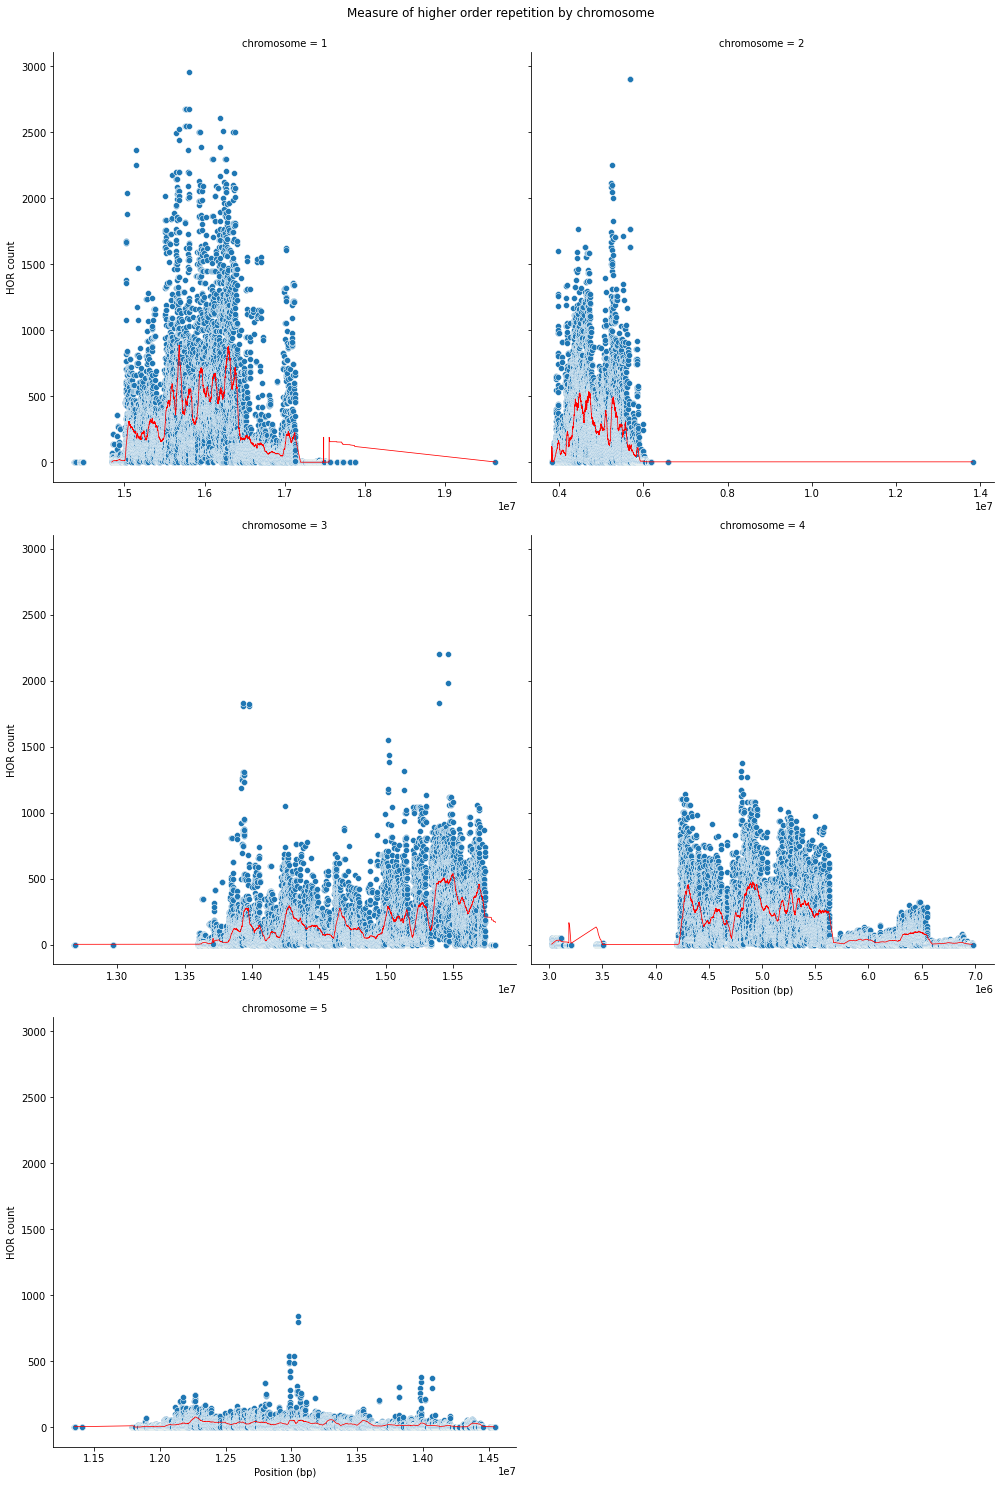

In [73]:
#scatter plot HOR by chromosome
g = sns.FacetGrid(
    accession_df,
    col="chromosome",
    height=7, col_wrap=2,
    margin_titles = True,
    sharex=False)

g.map(sns.scatterplot, "start", "HORcount")
g.map(sns.lineplot,"start","moving average1", color='red', linewidth = 0.75)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Measure of higher order repetition by chromosome')
g.set_axis_labels("Position (bp)","HOR count")

clist = [1,2,3,4,5]
for ax in g.axes_dict.values():
    for i in wanted:
        if i[0] == clist[wanted.index(i)]:
            g.set(xlim=(i[1], i[2]), ylim=(0, 3000))
g.fig.savefig("HORscatter.png")

c:\users\christie and victori\pycharmprojects\satellite_research_project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\christie and victori\pycharmprojects\satellite_research_project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\christie and victori\pycharmprojects\satellite_research_project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and wi

(0.0, 0.1)

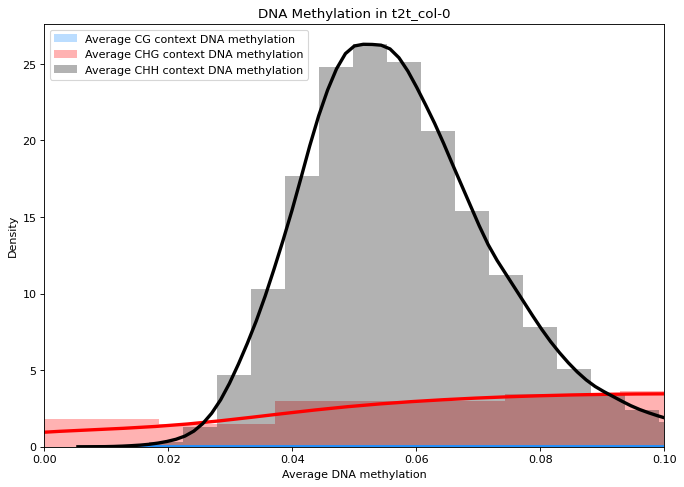

In [87]:
#histogram of methylation
plt.pyplot.figure(figsize=(10,7), dpi= 80) #change size of plot

x = accession_df["cg.mean"]
y = accession_df["chg.mean"]
z = accession_df["chh.mean"]
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':3}) # alpha changes opacity of bars, kde plots line on graph
sns.distplot(x, color="dodgerblue", label="Average CG context DNA methylation", **kwargs) 
sns.distplot(y, color="red", label="Average CHG context DNA methylation", **kwargs) 
sns.distplot(z, color="black", label="Average CHH context DNA methylation", **kwargs) 
plt.title("DNA Methylation in t2t_col-0")
plt.legend()
plt.xlabel("Average DNA methylation")
plt.xlim(0,0.1)

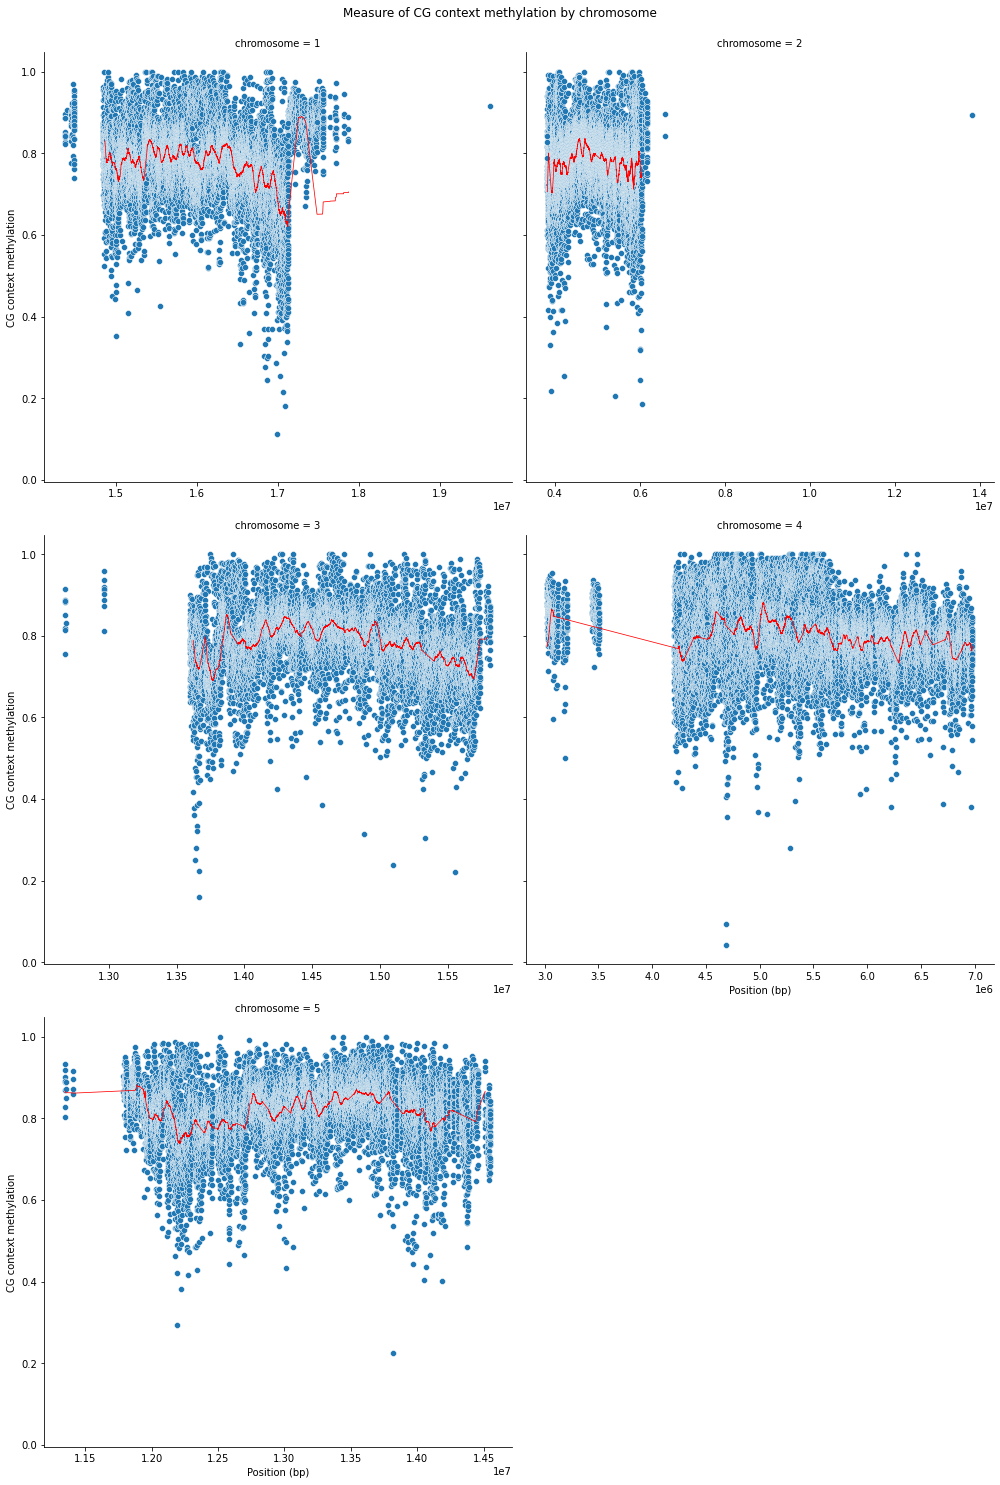

In [74]:
#scatter plot cg context methylation by chromosome
g = sns.FacetGrid(
    accession_df,
    col="chromosome",
    height=7, col_wrap=2,
    margin_titles = True,
    sharex=False)

g.map(sns.scatterplot, "start", "cgmean")
g.map(sns.lineplot,"start","moving average2", color='red', linewidth = 0.75)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Measure of CG context methylation by chromosome')
g.set_axis_labels("Position (bp)","CG context methylation")

clist = [1,2,3,4,5]
for ax in g.axes_dict.values():
    for i in wanted:
        if i[0] == clist[wanted.index(i)]:
            g.set(xlim=(i[1], i[2]), ylim=(0, 3000))
g.fig.savefig("CGscatter.png")

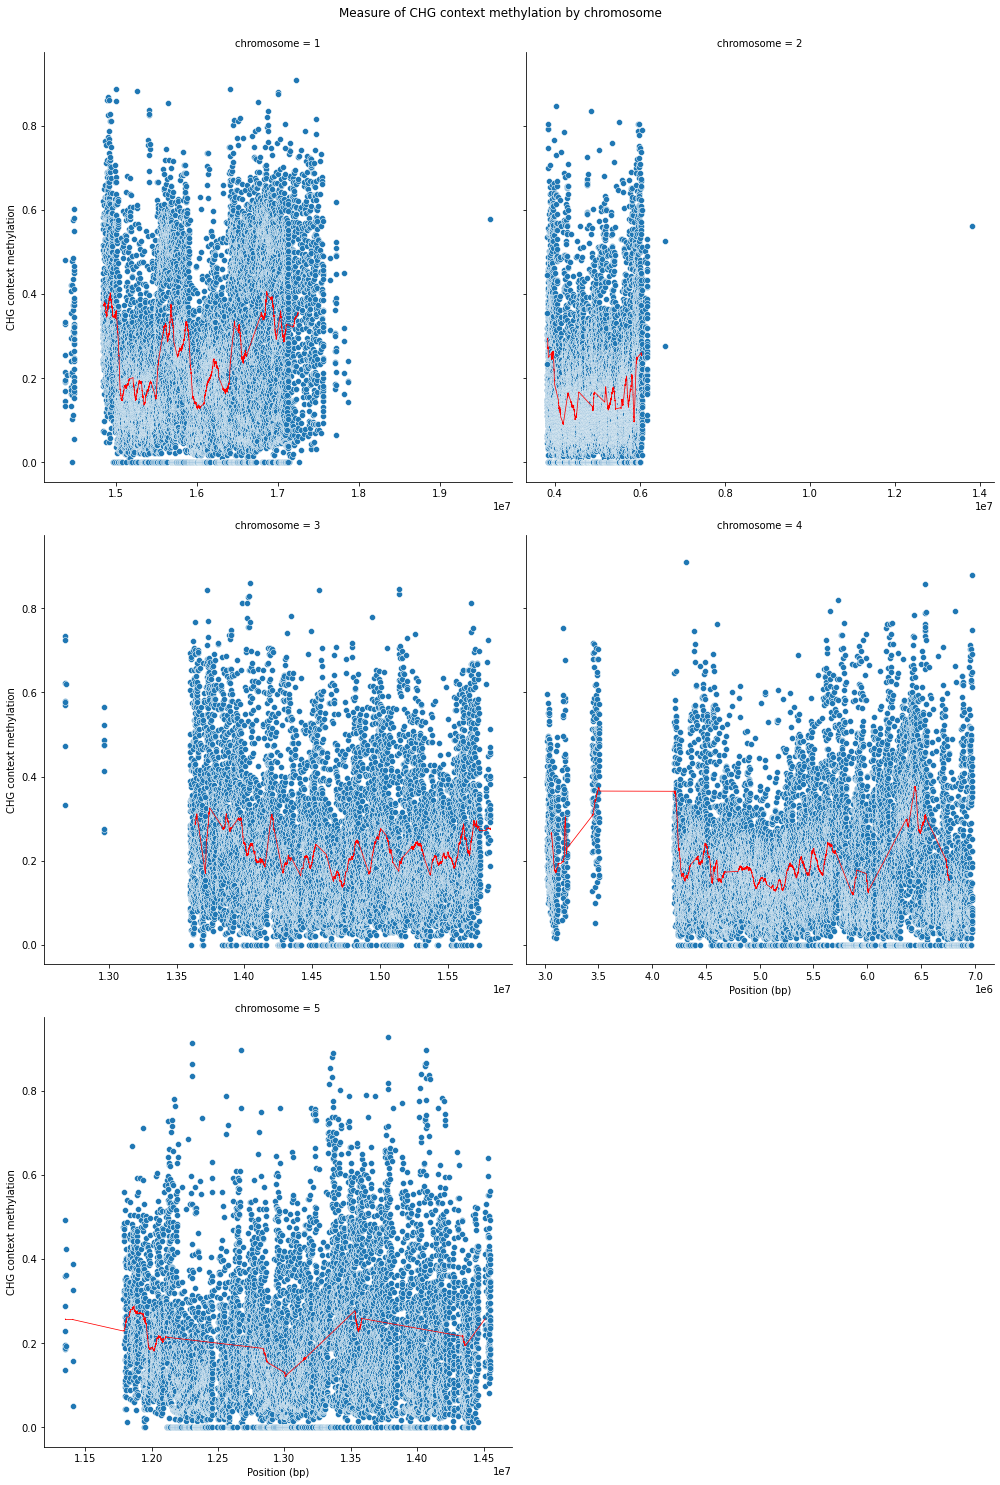

In [75]:
#scatter plot chg context methylation by chromsome
g = sns.FacetGrid(
    accession_df,
    col="chromosome",
    height=7, col_wrap=2,
    margin_titles = True,
    sharex=False)

g.map(sns.scatterplot, "start", "chgmean")
g.map(sns.lineplot,"start","moving average3", color='red', linewidth = 0.75)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Measure of CHG context methylation by chromosome')
g.set_axis_labels("Position (bp)","CHG context methylation")

clist = [1,2,3,4,5]
for ax in g.axes_dict.values():
    for i in wanted:
        if i[0] == clist[wanted.index(i)]:
            g.set(xlim=(i[1], i[2]), ylim=(0, 3000))
g.fig.savefig("CHGscatter.png")

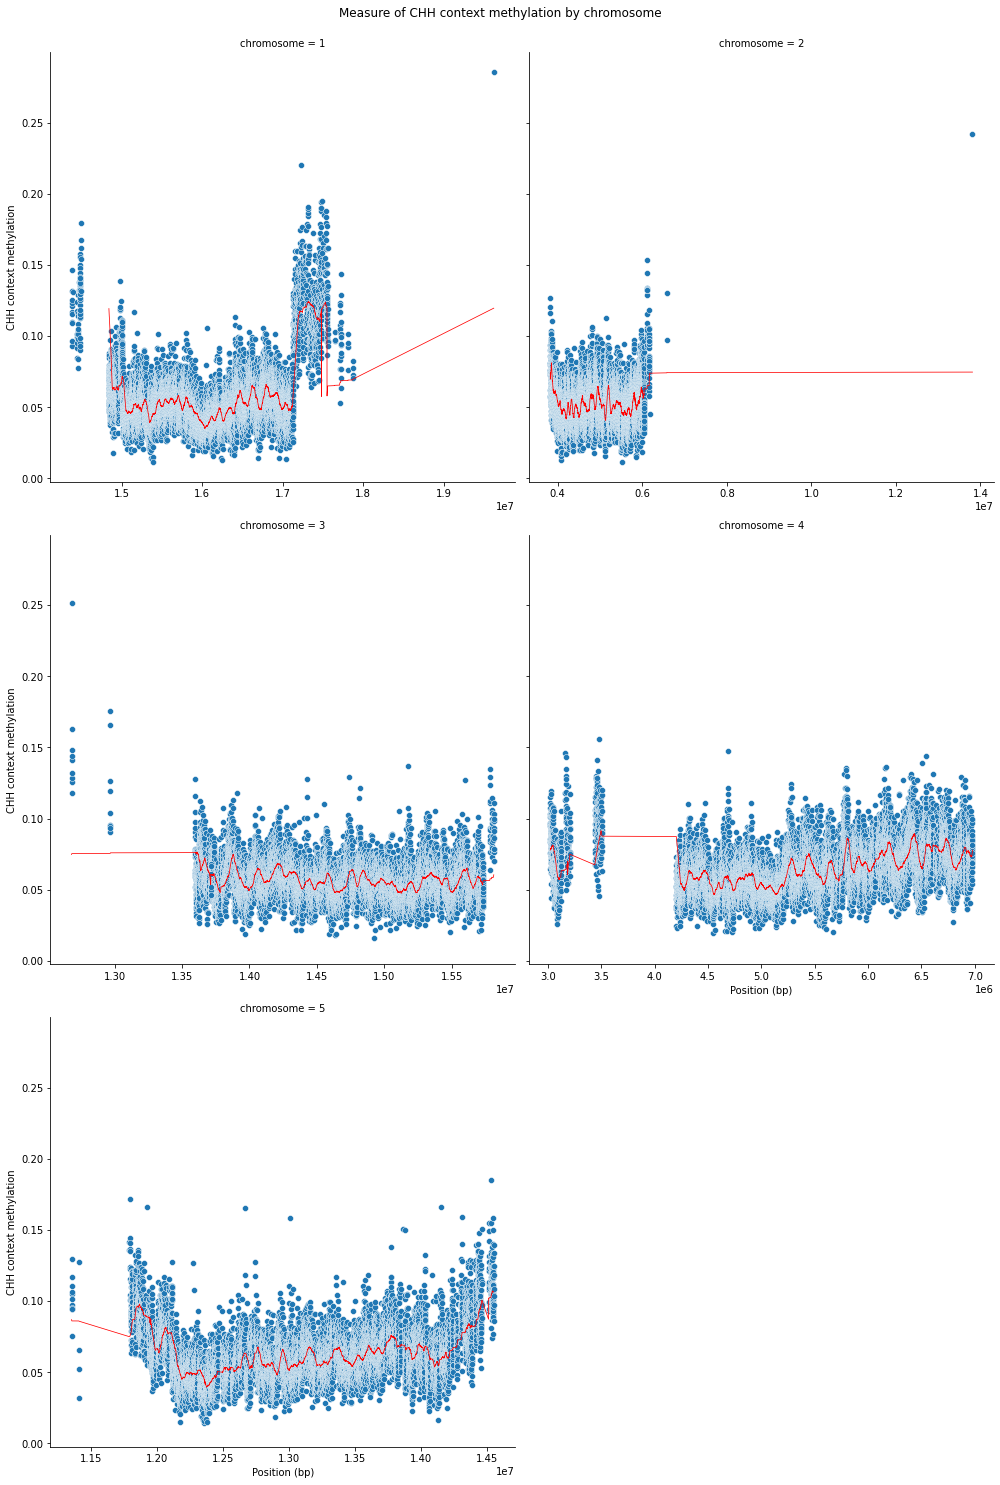

In [76]:
#scatter plot chh
g = sns.FacetGrid(
    accession_df,
    col="chromosome",
    height=7, col_wrap=2,
    margin_titles = True,
    sharex=False)

g.map(sns.scatterplot, "start", "chhmean")
g.map(sns.lineplot,"start","moving average4", color='red', linewidth = 0.75)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Measure of CHH context methylation by chromosome')
g.set_axis_labels("Position (bp)","CHH context methylation")

clist = [1,2,3,4,5]
for ax in g.axes_dict.values():
    for i in wanted:
        if i[0] == clist[wanted.index(i)]:
            g.set(xlim=(i[1], i[2]), ylim=(0, 3000))
g.fig.savefig("CHHscatter.png")

c:\users\christie and victori\pycharmprojects\satellite_research_project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\christie and victori\pycharmprojects\satellite_research_project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-2.0, 2.0)

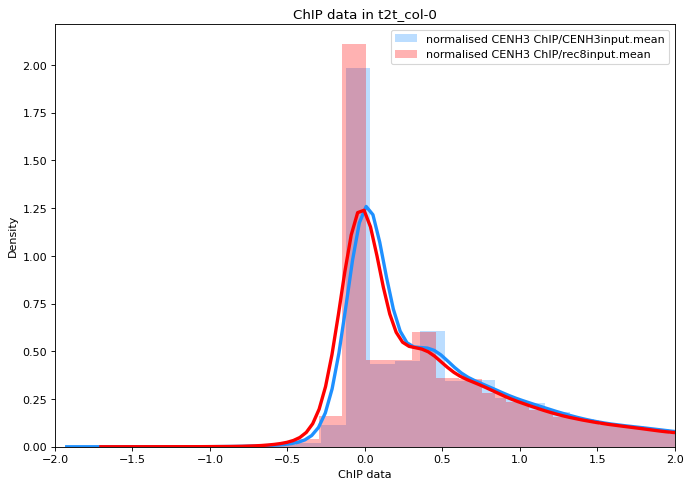

In [88]:
#histogram of CENH3 ChIP enrichment
plt.pyplot.figure(figsize=(10,7), dpi= 80) #change size of plot

x = accession_df["log2chipceninput"]
y = accession_df["log2chiprecinput"]
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':3}) # alpha changes opacity of bars, kde plots line on graph
sns.distplot(x, color="dodgerblue", label="normalised CENH3 ChIP/CENH3input.mean", **kwargs) 
sns.distplot(y, color="red", label="normalised CENH3 ChIP/rec8input.mean", **kwargs) 
plt.title("ChIP data in t2t_col-0")
plt.legend()
plt.xlabel("ChIP data")
plt.xlim(-2,2)

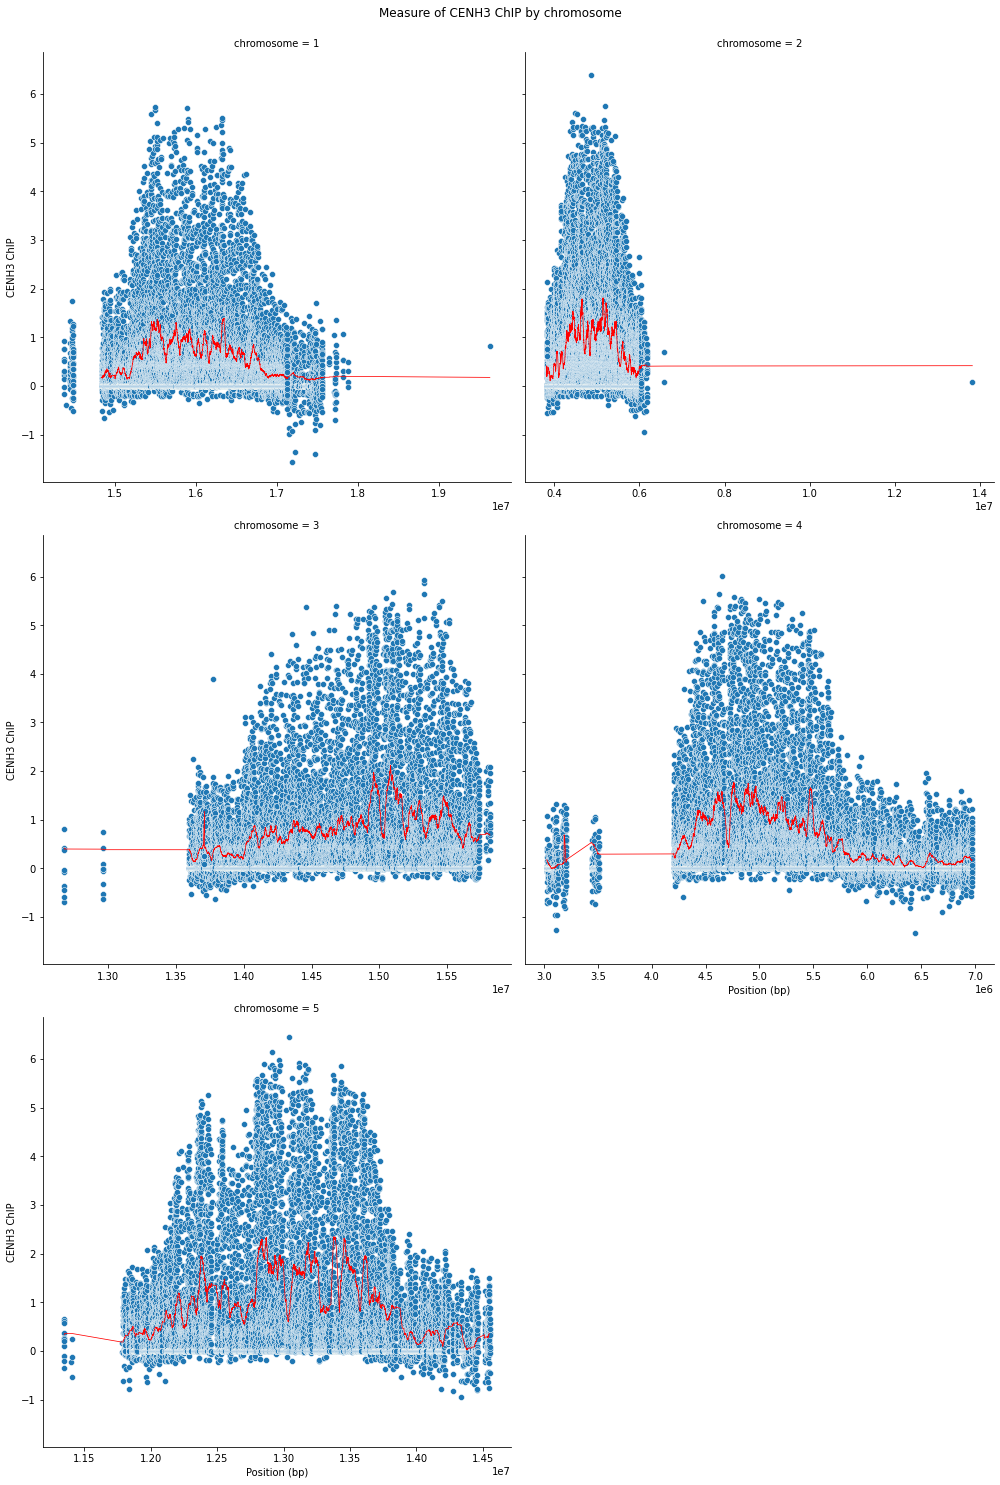

In [77]:
#scatter plot of CENH3 ChIP
g = sns.FacetGrid(
    accession_df,
    col="chromosome",
    height=7, col_wrap=2,
    margin_titles = True,
    sharex=False)

g.map(sns.scatterplot, "start", "log2chipceninput")
g.map(sns.lineplot,"start","moving average5", color='red', linewidth = 0.75)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Measure of CENH3 ChIP by chromosome')
g.set_axis_labels("Position (bp)","CENH3 ChIP")

clist = [1,2,3,4,5]
for ax in g.axes_dict.values():
    for i in wanted:
        if i[0] == clist[wanted.index(i)]:
            g.set(xlim=(i[1], i[2]), ylim=(0, 3000))
g.fig.savefig("CHIPscatter.png")